In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from pipeline_functions import *
from sklearn.model_selection import train_test_split
import optuna
from xgboost import XGBClassifier

c:\Users\32mor\anaconda3\envs\finance_scoring\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = os.path.join("LendingGame3_Round3","PastLoans.csv")
df = pd.read_csv(path, index_col='id')

C:\Users\32mor\AppData\Local\Temp\ipykernel_35452\658518250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["income"])


<AxesSubplot: xlabel='income', ylabel='Density'>

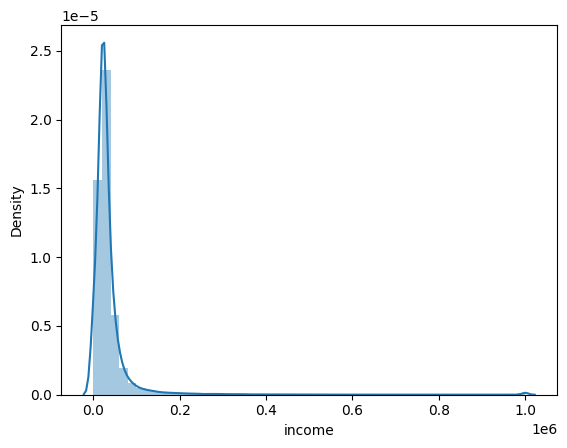

In [16]:
sns.distplot(df["income"])

<AxesSubplot: xlabel='default', ylabel='count'>

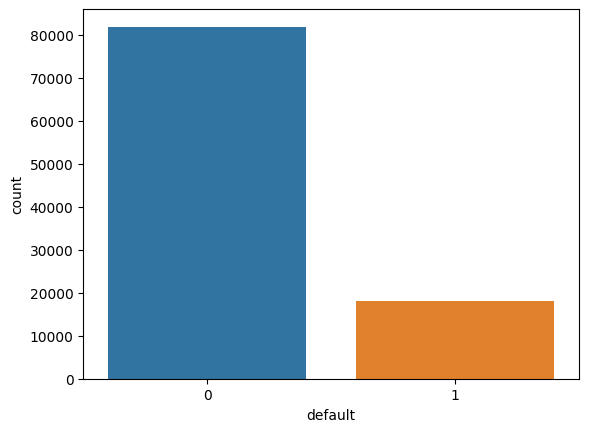

In [14]:
sns.countplot(x="default",data=df)

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
pipeline = full_pipeline()
X_train_final = pipeline.fit_transform(X_train)
X_val_final = pipeline.fit_transform(X_val)

In [6]:
optuna_objective = create_optuna_pipeline(X_train_final, y_train, X_val_final, y_val)
study = optuna.create_study(direction="maximize")
study.optimize(optuna_objective, n_trials=20, n_jobs=-1)

[I 2022-10-07 12:19:45,460] A new study created in memory with name: no-name-da745731-2c08-45b2-9b84-67f4e962c8cb
[W 2022-10-07 12:19:45,488] Trial 0 failed because of the following error: TypeError("compute_sample_weight() missing 1 required positional argument: 'y'")
Traceback (most recent call last):
  File "c:\Users\32mor\anaconda3\envs\finance_scoring\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "c:\Users\32mor\OneDrive\Documents\HEC\M2 DSB\introduction to finance\pipeline_functions.py", line 47, in optuna_objective
    sample_weights = compute_sample_weight(y_train)
TypeError: compute_sample_weight() missing 1 required positional argument: 'y'
[W 2022-10-07 12:19:45,496] Trial 1 failed because of the following error: TypeError("compute_sample_weight() missing 1 required positional argument: 'y'")
Traceback (most recent call last):
  File "c:\Users\32mor\anaconda3\envs\finance_scoring\lib\site-packages\optuna\study\